In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y=data[['전국 관객수']]
y1=data[['전국 관객수 분류']]

In [4]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-4-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-4-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [5]:
#hard voting 앙상블
model1=SVC(kernel='linear', C=0.06)
model2=GaussianNB(var_smoothing=0.2)
model3=RandomForestClassifier()
model4=KNeighborsClassifier(n_neighbors=7)
model5=LogisticRegression(C=0.1,multi_class='ovr',solver='lbfgs')
model1_1=SVC(kernel='linear', C=0.22)
model2_1=GaussianNB(var_smoothing=0.1)
model3_1=RandomForestClassifier()
model4_1=KNeighborsClassifier(n_neighbors=10)
model5_1=LogisticRegression(C=2.5,multi_class='multinomial',solver='lbfgs')
model1_2=SVC(kernel='linear', C=0.14)
model2_2=GaussianNB(var_smoothing=0.25)
model3_2=RandomForestClassifier()
model4_2=KNeighborsClassifier(n_neighbors=39)
model5_2=LogisticRegression(C=6,multi_class='multinomial',solver='lbfgs')


vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),('knn',model4),('log',model5)],
    voting='hard')
vote_model1 = VotingClassifier(
    estimators=[('svc',model1_1),('naive',model2_1),('forest',model3_1),('knn',model4_1),('log',model5_1)],
    voting='hard')
vote_model2 = VotingClassifier(
    estimators=[('svc',model1_2),('naive',model2_2),('forest',model3_2),('knn',model4_2),('log',model5_2)],
    voting='hard')

X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

vote_model.fit(X_train,y1_train)
vote_model1.fit(X_train1,y1_train1)
vote_model2.fit(X_train2,y1_train2)

y_pred=vote_model.predict(X_test)
y_pred1=vote_model1.predict(X_test1)
y_pred2=vote_model2.predict(X_test2)

print("학습 데이터 점수 : {}".format(vote_model.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(vote_model.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(vote_model1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(vote_model1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(vote_model2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(vote_model2.score(X_test2,y1_test2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


학습 데이터 점수 : 0.715
평가 데이터 점수 : 0.7
학습 데이터 점수 : 0.6925
평가 데이터 점수 : 0.7
학습 데이터 점수 : 0.6875
평가 데이터 점수 : 0.685


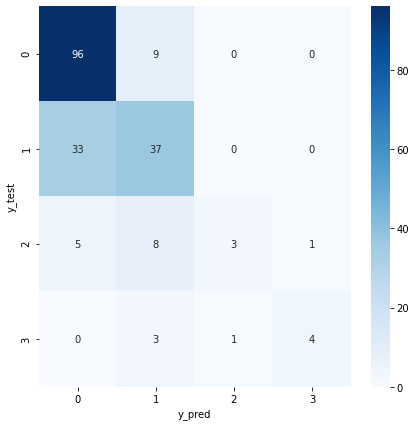

In [6]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y1_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [7]:
print(classification_report(y1_test,y_pred,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       105
           1       0.65      0.53      0.58        70
           2       0.75      0.18      0.29        17
           3       0.80      0.50      0.62         8

    accuracy                           0.70       200
   macro avg       0.73      0.53      0.57       200
weighted avg       0.70      0.70      0.67       200



In [8]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      96   9  0  0
2      33  37  0  0
3       5   8  3  1
4       0   3  1  4 
col_0   1   2  3  4
row_0              
1      91  14  0  0
2      27  42  1  0
3       4   9  3  1
4       0   1  3  4 
col_0   1   2  3  4
row_0              
1      93  12  0  0
2      33  37  0  0
3       5   8  3  1
4       0   2  2  4


In [9]:
#soft voting 앙상블
model1=SVC(kernel='linear', C=0.06, probability=True)
model2=GaussianNB(var_smoothing=0.2)
model3=RandomForestClassifier()
model4=KNeighborsClassifier(n_neighbors=7)
model5=LogisticRegression(C=0.1,multi_class='ovr',solver='lbfgs')
model1_1=SVC(kernel='linear', C=0.22, probability=True)
model2_1=GaussianNB(var_smoothing=0.1)
model3_1=RandomForestClassifier()
model4_1=KNeighborsClassifier(n_neighbors=10)
model5_1=LogisticRegression(C=2.5,multi_class='multinomial',solver='lbfgs')
model1_2=SVC(kernel='linear', C=0.14, probability=True)
model2_2=GaussianNB(var_smoothing=0.25)
model3_2=RandomForestClassifier()
model4_2=KNeighborsClassifier(n_neighbors=39)
model5_2=LogisticRegression(C=6,multi_class='multinomial',solver='lbfgs')


vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),('knn',model4),('log',model5)],
    voting='soft')
vote_model1 = VotingClassifier(
    estimators=[('svc',model1_1),('naive',model2_1),('forest',model3_1),('knn',model4_1),('log',model5_1)],
    voting='soft')
vote_model2 = VotingClassifier(
    estimators=[('svc',model1_2),('naive',model2_2),('forest',model3_2),('knn',model4_2),('log',model5_2)],
    voting='soft')

X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

vote_model.fit(X_train,y1_train)
vote_model1.fit(X_train1,y1_train1)
vote_model2.fit(X_train2,y1_train2)

y_pred=vote_model.predict(X_test)
y_pred1=vote_model1.predict(X_test1)
y_pred2=vote_model2.predict(X_test2)

print("학습 데이터 점수 : {}".format(vote_model.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(vote_model.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(vote_model1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(vote_model1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(vote_model2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(vote_model2.score(X_test2,y1_test2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


학습 데이터 점수 : 0.815
평가 데이터 점수 : 0.69
학습 데이터 점수 : 0.785
평가 데이터 점수 : 0.685
학습 데이터 점수 : 0.78
평가 데이터 점수 : 0.665


In [10]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      93  12  0  0
2      31  38  1  0
3       4   9  3  1
4       0   2  2  4 
col_0   1   2  3  4
row_0              
1      89  15  1  0
2      29  40  1  0
3       4   8  4  1
4       0   1  3  4 
col_0   1   2  3  4
row_0              
1      92  12  1  0
2      34  34  2  0
3       5   8  3  1
4       0   2  2  4


In [11]:
#voting 앙상블 회귀
reg1 = LinearRegression()
reg2 = SVR(kernel='rbf',C=4800000, epsilon=450000)
reg3 = KNeighborsRegressor(n_neighbors=10, weights='distance')
reg1_1 = LinearRegression()
reg2_1 = SVR(kernel='poly',C=710000, epsilon=750000)
reg3_1 = KNeighborsRegressor(n_neighbors=13, weights='distance')
reg1_2 = LinearRegression()
reg2_2 = SVR(kernel='rbf',C=2700000, epsilon=400000)
reg3_2 = KNeighborsRegressor(n_neighbors=12, weights='distance')

vote_reg_model = VotingRegressor(
    estimators=[('linear',reg1),('svr',reg2),('knr',reg3)],
    weights=[1,1,1])
vote_reg_model1 = VotingRegressor(
    estimators=[('linear',reg1_1),('svr',reg2_1),('knr',reg3_1)],
    weights=[1,1,1])
vote_reg_model2 = VotingRegressor(
    estimators=[('linear',reg1_2),('svr',reg2_2),('knr',reg3_2)],
    weights=[1,1,1])

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5,test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5,test_size=0.2)

vote_reg_model.fit(X_train,y_train)
vote_reg_model1.fit(X_train1,y_train1)
vote_reg_model2.fit(X_train2,y_train2)

y_pred=vote_reg_model.predict(X_test)
y_pred1=vote_reg_model1.predict(X_test1)
y_pred2=vote_reg_model2.predict(X_test2)

for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0
        
print("학습 데이터 점수 : {}".format(vote_reg_model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(vote_reg_model.score(X_test,y_test)))
print("학습 데이터 점수 : {}".format(vote_reg_model1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(vote_reg_model1.score(X_test1,y_test1)))
print("학습 데이터 점수 : {}".format(vote_reg_model2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(vote_reg_model2.score(X_test2,y_test2)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


학습 데이터 점수 : 0.885332071188339
평가 데이터 점수 : 0.6008249655577143
학습 데이터 점수 : 0.8466187571153526
평가 데이터 점수 : 0.6355629402147203
학습 데이터 점수 : 0.8554631743939562
평가 데이터 점수 : 0.6154941853136258


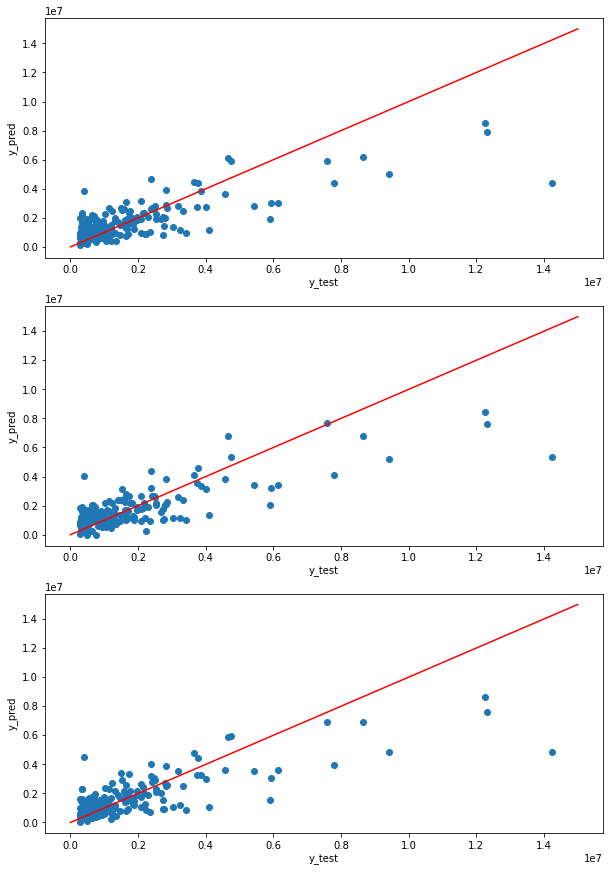

In [12]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.show()